In [1]:
label_lst = ['Male', 'Big_Nose', 'Pointy_Nose', 'Eyeglasses', 'Narrow_Eyes']
where_to_unl_lst = ['nose', 'eye', 'noseeye']
unl_epochs_lst = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
ori_training_epochs = 100 
RT_training_epochs = 100 
unlearn_times = 3

Plotting metrics for Label: Male, Region: nose


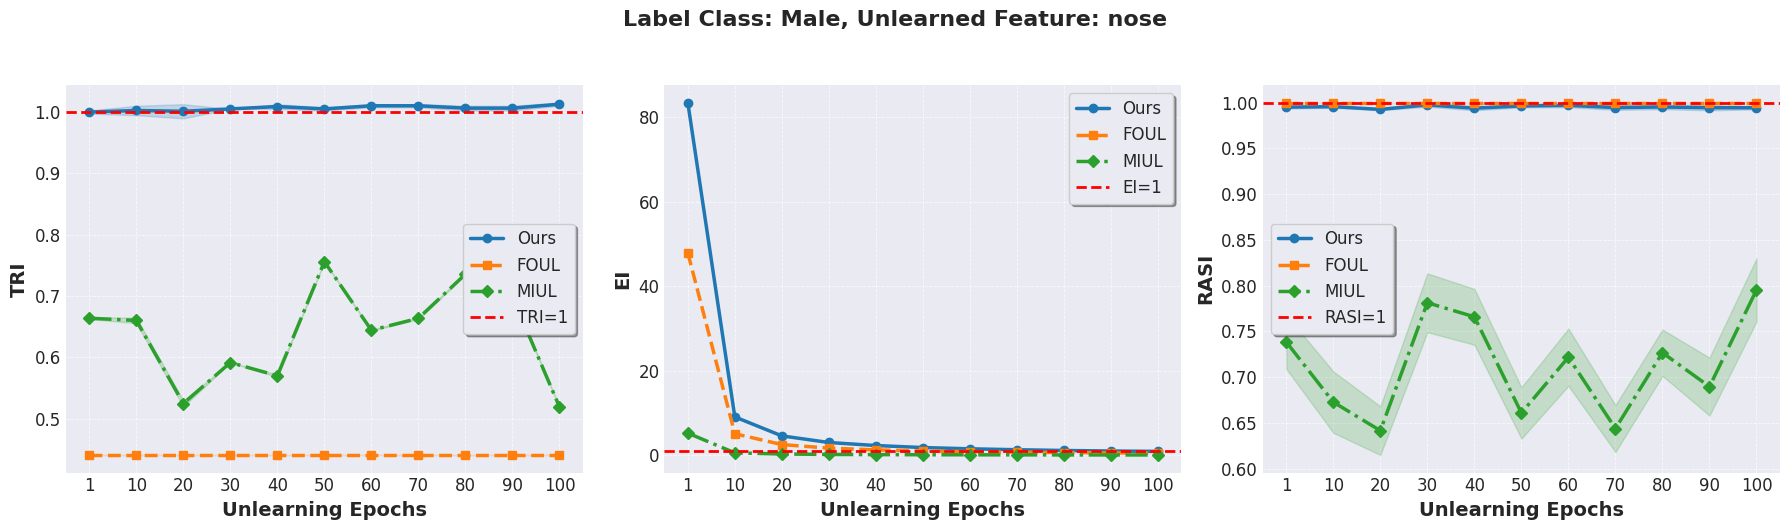

Plotting metrics for Label: Male, Region: eye


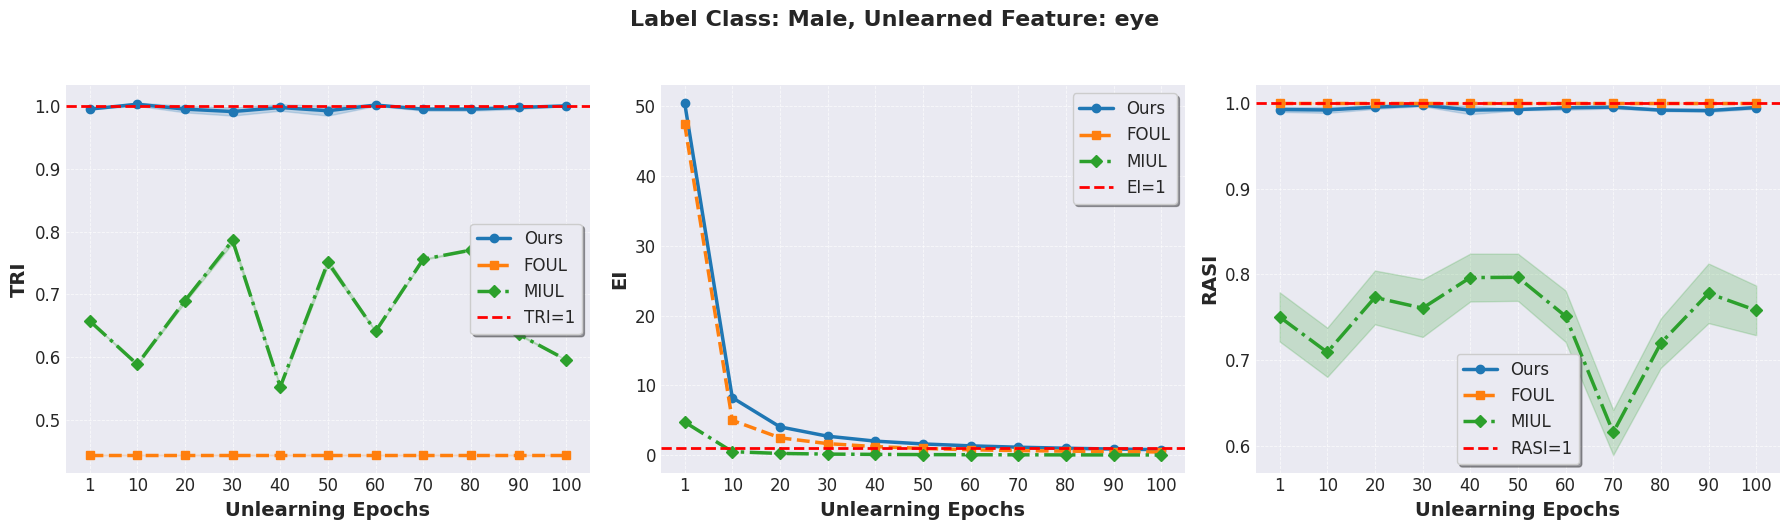

Plotting metrics for Label: Male, Region: noseeye


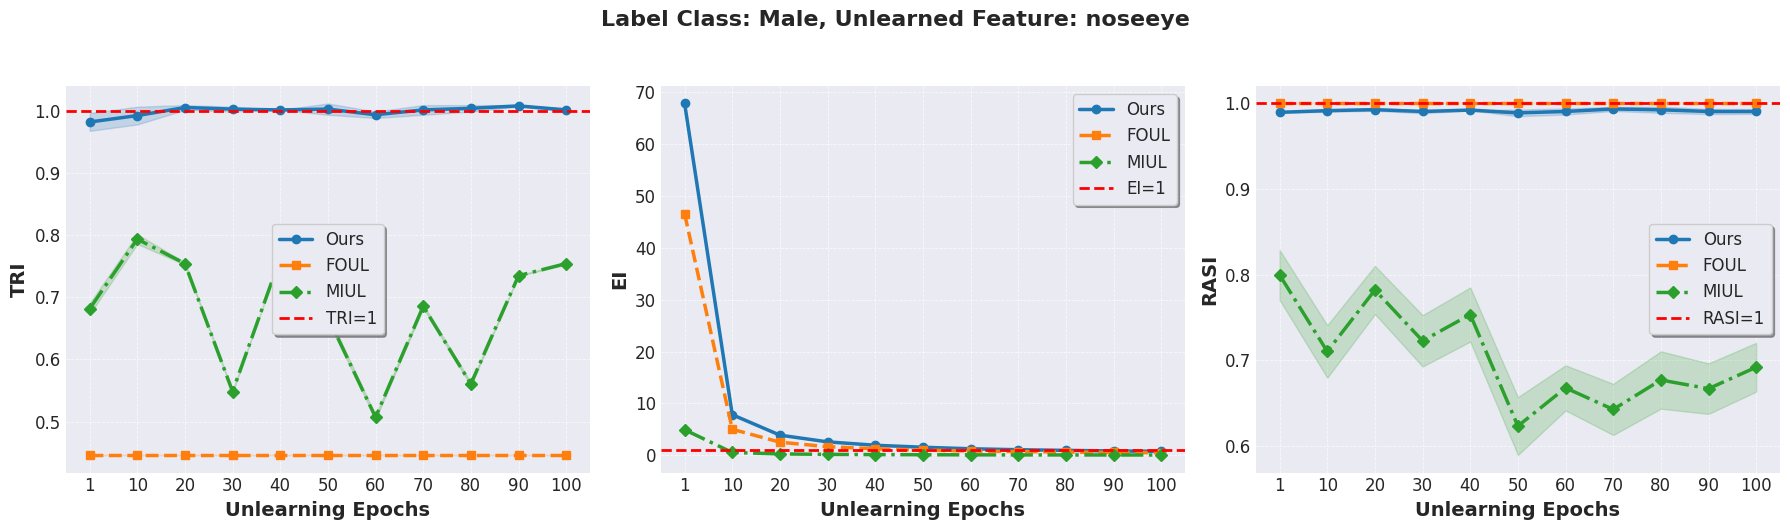

Plotting metrics for Label: Big_Nose, Region: nose


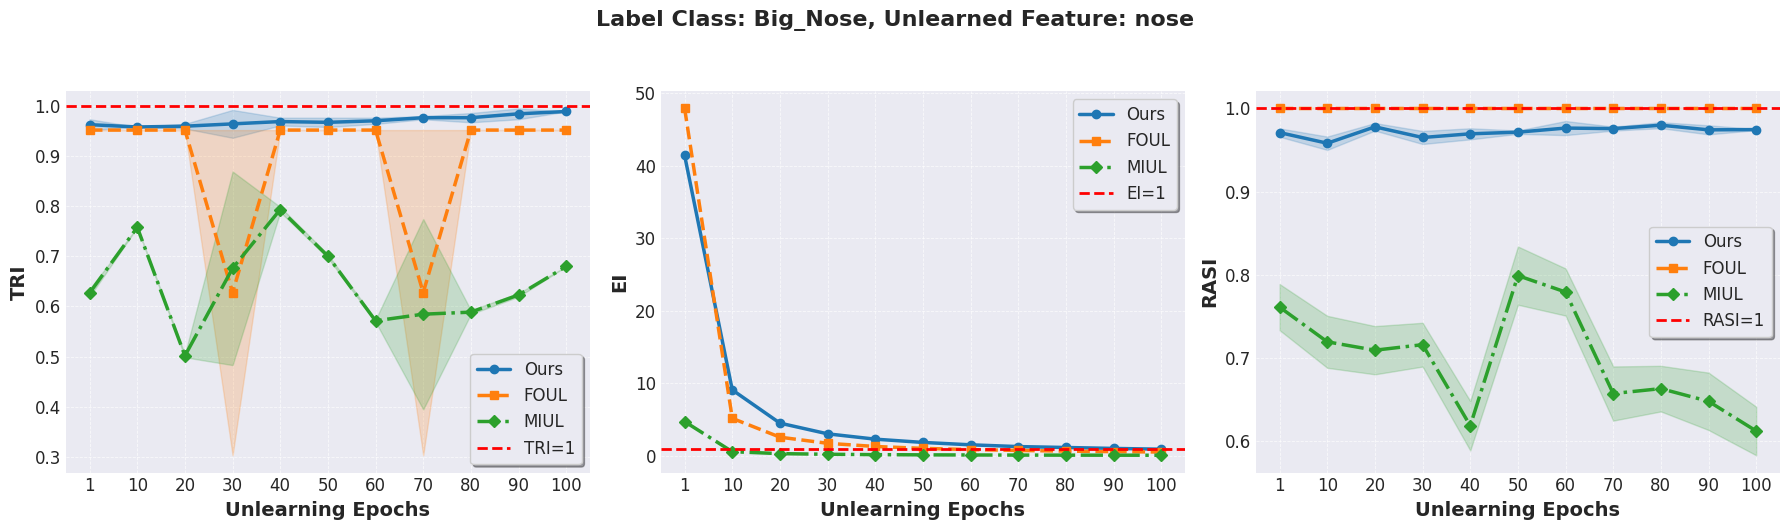

Plotting metrics for Label: Pointy_Nose, Region: nose


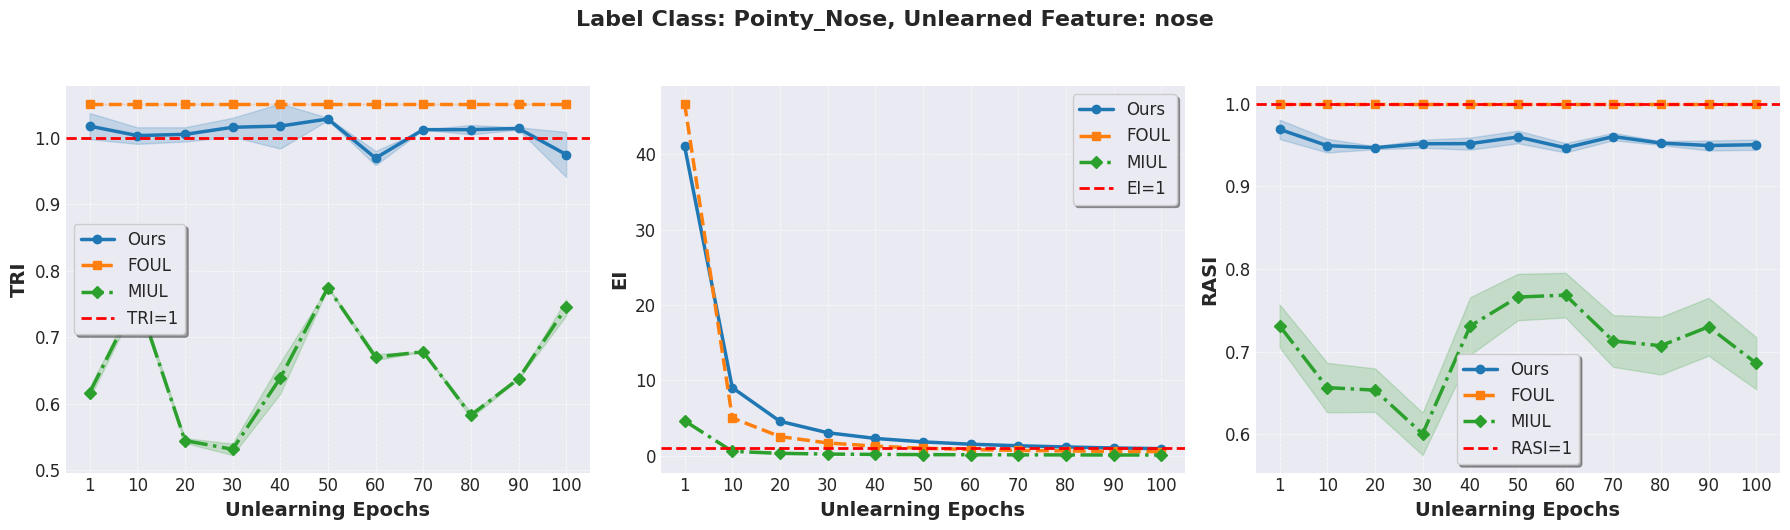

Plotting metrics for Label: Eyeglasses, Region: eye


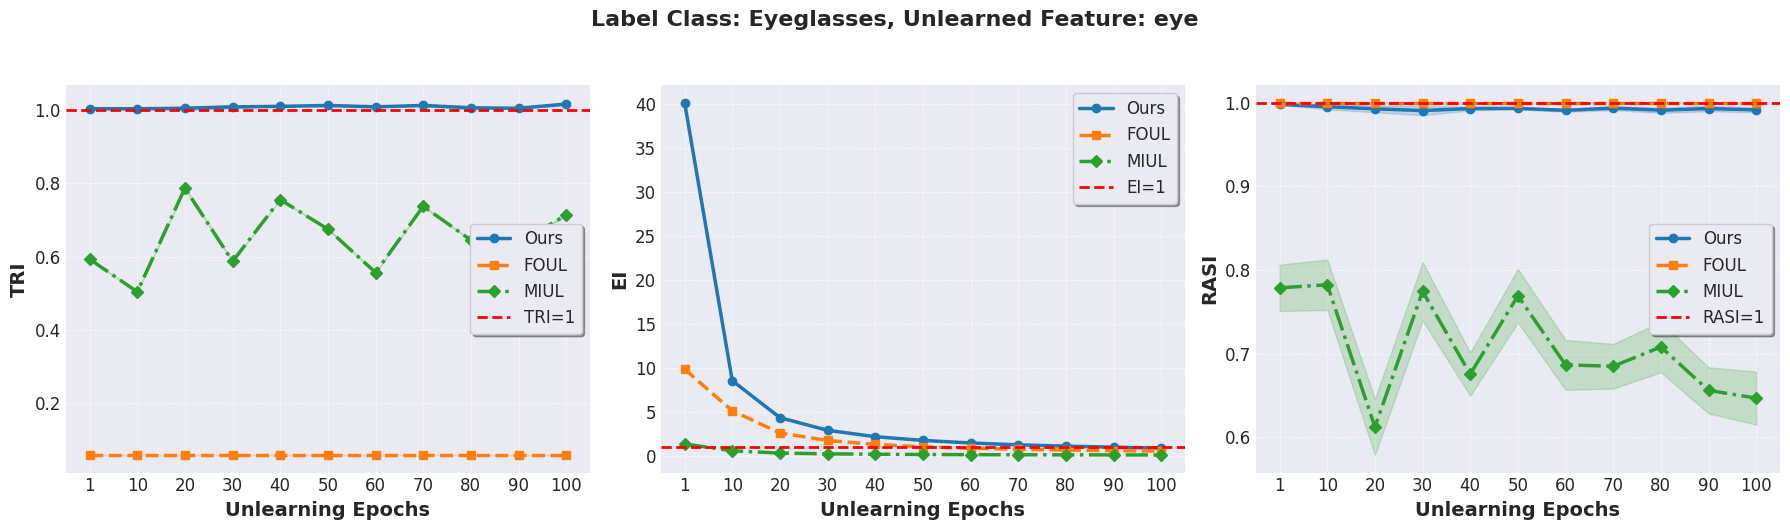

Plotting metrics for Label: Narrow_Eyes, Region: eye


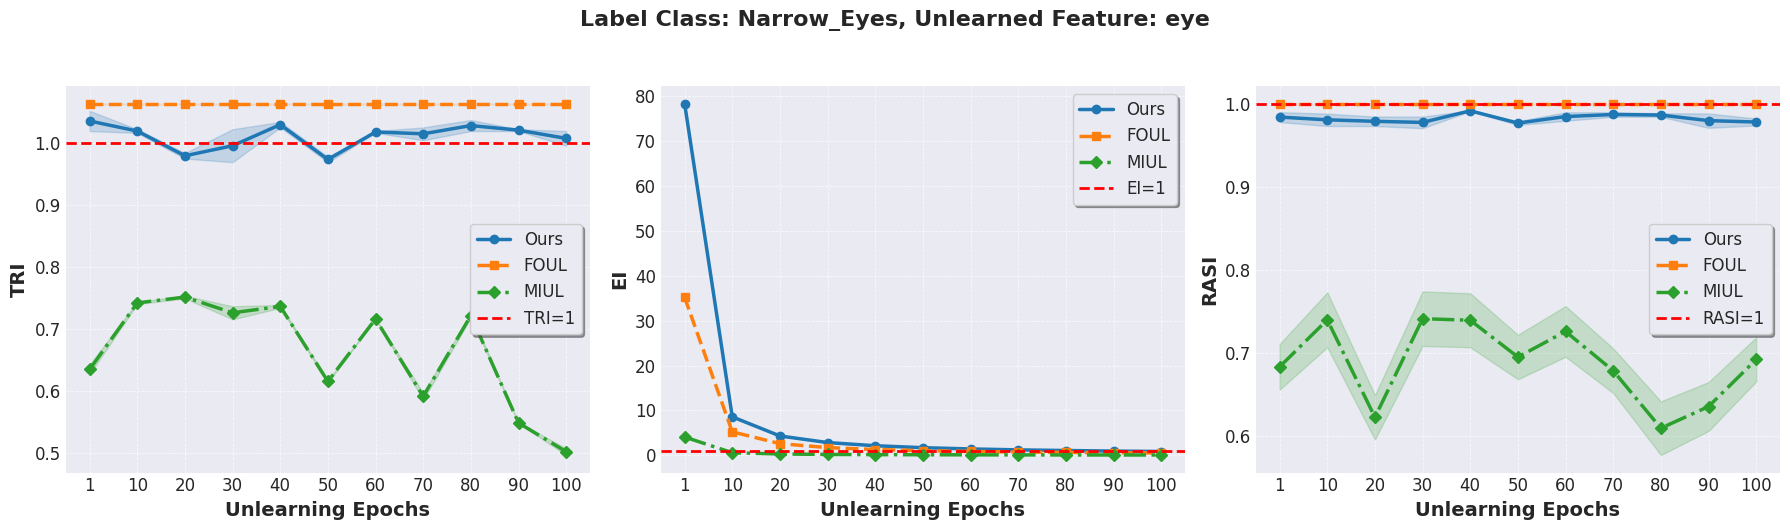

In [ ]:
import pickle
import pandas as pd 
import random
import numpy as np
import random
import numpy as np

from copy import deepcopy 

import matplotlib.pyplot as plt
import os
from copy import deepcopy


with open(f'results_cv/TRI.dict', 'rb') as f:
    TRI_dict = pickle.load(f)
with open(f'results_cv/EI.dict', 'rb') as f:
    EI_dict = pickle.load(f)
with open(f'results_cv/RASI.dict', 'rb') as f:
    RASI_dict = pickle.load(f)

def plot_metrics_row(label, where_to_unl):
    # Apply a clean style
    plt.style.use('seaborn-v0_8-darkgrid')
    
    # Define markers, line styles, and colors for each model type
    markers = ['o', 's', 'D', '^']
    linestyles = ['-', '--', '-.', ':']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Custom color palette
    
    # Create a figure with 3 subplots in a row
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Get data for the specific label and where_to_unl
    TRI_df_means, TRI_df_stds = TRI_dict[label][where_to_unl]
    EI_df_means, EI_df_stds = EI_dict[label][where_to_unl]
    RASI_df_means, RASI_df_stds = RASI_dict[label][where_to_unl]
    
    # Rename index
    if 'BL1' in TRI_df_means.index:
        TRI_df_means = TRI_df_means.rename(index={'BL1': 'FOUL'})
        TRI_df_stds = TRI_df_stds.rename(index={'BL1': 'FOUL'})
        
    if 'BL1' in EI_df_means.index:
        EI_df_means = EI_df_means.rename(index={'BL1': 'FOUL'})
        EI_df_stds = EI_df_stds.rename(index={'BL1': 'FOUL'})
        
    if 'BL1' in RASI_df_means.index:
        RASI_df_means = RASI_df_means.rename(index={'BL1': 'FOUL'})
        RASI_df_stds = RASI_df_stds.rename(index={'BL1': 'FOUL'})
    
    # List of metrics, dataframes, and axes
    metrics = ['TRI', 'EI', 'RASI']
    means_list = [TRI_df_means, EI_df_means, RASI_df_means]
    stds_list = [TRI_df_stds, EI_df_stds, RASI_df_stds]
    
    # Plot each metric
    for i, (metric, df_means, df_stds, ax) in enumerate(zip(metrics, means_list, stds_list, axes)):
        # # For EI, we need to adjust the dataframes
        # if metric == 'EI':
        #     df_means = df_means.iloc[:, 2:]
        #     df_stds = df_stds.iloc[:, 2:]
        
        # Plot each model with consistent color, marker, and shaded std area
        for (model, marker, linestyle, color) in zip(df_means.index, markers, linestyles, colors):
            means = df_means.loc[model]
            stds = df_stds.loc[model]
            
            # Line plot for the model
            ax.plot(
                df_means.columns, means, marker=marker, linestyle=linestyle, color=color, 
                linewidth=2.5, label=model
            )
            
            # Shaded area for standard deviation (skip for EI)
            if metric != 'EI':
                ax.fill_between(df_means.columns, means - stds, means + stds, color=color, alpha=0.2)
        
        # Add horizontal reference line
        if metric in ['EI', 'TRI', 'RASI']:
            ax.axhline(y=1, label=f'{metric}=1', linewidth=2, color='red', linestyle='--')
            
        # Add labels and grid
        ax.set_xlabel("Unlearning Epochs", fontsize=14, fontweight='bold')
        ax.set_ylabel(f"{metric}", fontsize=14, fontweight='bold')
        ax.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)
        
        # Set xticks
        ax.set_xticks(df_means.columns)
        ax.tick_params(axis='both', labelsize=12)
        
        # Only add legend to the first subplot to avoid redundancy
        # if i == 0:
        ax.legend(fontsize=12, loc='best', frameon=True, shadow=True)
    
    # Add overall title
    fig.suptitle(f"Label Class: {label}, Unlearned Feature: {where_to_unl}", fontsize=16, fontweight='bold', y=1.05)
    
    # Adjust layout to fit all elements
    plt.tight_layout()
    
    # Create output directory and save the figure
    os.makedirs(f'imgs', exist_ok=True)
    plt.savefig(f'imgs/{label}_{where_to_unl}_metrics.pdf', dpi=300, bbox_inches='tight')
    
    # Display the figure
    plt.show()

# Plot for each valid label and where_to_unl combination
for label in label_lst:
    for where_to_unl in where_to_unl_lst:
        if label == 'Big_Nose' and where_to_unl != 'nose': continue 
        if label == 'Eyeglasses' and where_to_unl != 'eye': continue
        if label == 'Narrow_Eyes' and where_to_unl != 'eye': continue
        if label == 'Pointy_Nose' and where_to_unl != 'nose': continue
        
        print(f"Plotting metrics for Label: {label}, Region: {where_to_unl}")
        plot_metrics_row(label, where_to_unl)